# Uploading Images from a Jupyter Notebook (Local Machine) to S3 Bucket
- Remember to pip install all python libraries (Opencv, Pillow, boto3 etc)
- The last code shows both original and transformed images before uploading to aws s3 bucket

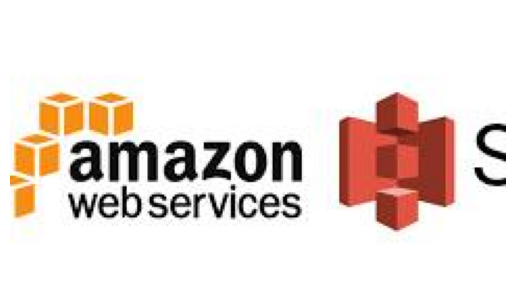

In [15]:
# opencv approach
import numpy as np
import cv2
import matplotlib.pyplot as plt
#import metadata_parser
from PIL import Image
import re
#import boto3 for aws
import boto3
from  pathlib import Path
import io
from credentials import access_key, secret_key
import os
import random




image = "D:/Nana Tieku/screen recording'/AWS/s3.jpg"
#Read image in link with the strings attacheded
img = cv2.imread(image)
# convert from BGR to RGB so we can plot using matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(img)
plt.show()

# Image transformaton
# get the image shape (size scaling)
'''rows, cols, dim = img.shape
img_shrinked = cv2.resize(img, (250, 200),
                     interpolation=cv2.INTER_AREA)
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(img_shrinked)
plt.show()'''



#Changing data from array to be saved in-memory
img_shrinked = Image.fromarray(img)
# Save the image to an in-memory file
in_mem_file = io.BytesIO()
img_shrinked.save(in_mem_file, format='png')
in_mem_file.seek(0)


#Establishing connection to aws
s3_client=boto3.client('s3', 
            aws_access_key_id=access_key, 
            aws_secret_access_key= secret_key,
                       region_name="us-east-1"
            )

 # uploading data to AWS
s3_client.put_object(Bucket='asw-demos-hope', Key = 'image.jpg', Body = in_mem_file, ContentType= 'image/jpg')
num += 1

D:/Nana Tieku/screen recording'\AWS\images (1).jpg


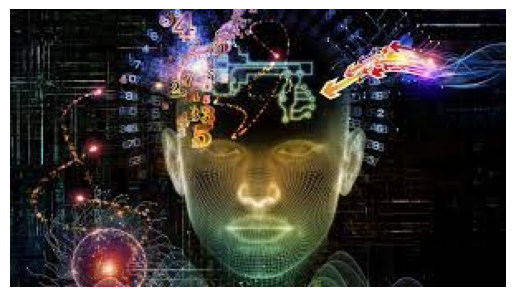

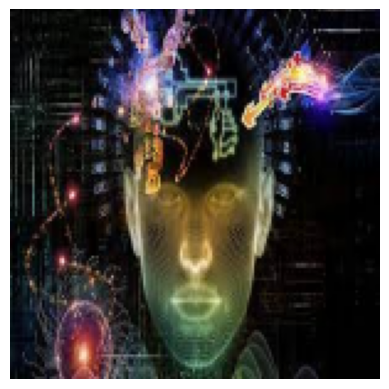

D:/Nana Tieku/screen recording'\AWS\images.jpg


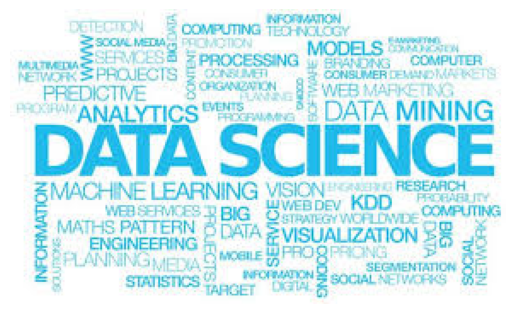

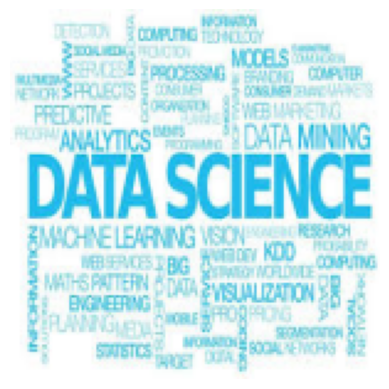

D:/Nana Tieku/screen recording'\AWS\s3.jpg


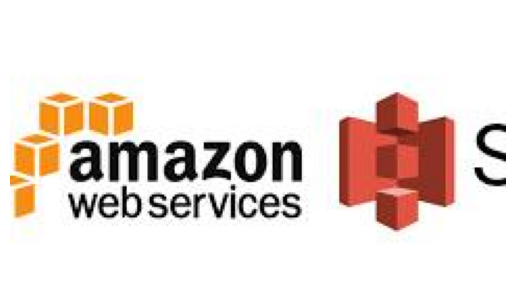

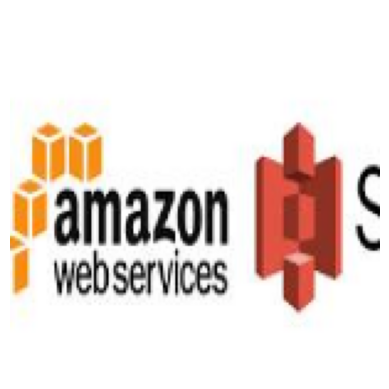

In [16]:
# Opencv Approach
import numpy as np
import cv2
import matplotlib.pyplot as plt
#import metadata_parser
from PIL import Image
import re
#import boto3 for aws
import boto3
from  pathlib import Path
import io
from credentials import access_key, secret_key
import os
import glob




location = "D:/Nana Tieku/screen recording'/AWS"
ext = '*/*.jpg'
num=random.random()
#Establishing connection to aws
s3_client=boto3.client('s3', 
            region_name="us-east-1",
            aws_access_key_id=access_key, 
            aws_secret_access_key= secret_key,)

for images in glob.glob(location + ext):
    print(images)
    #Read image in link with the strings attacheded
    img = cv2.imread(images)
     # convert from BGR to RGB so we can plot using matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # disable x & y axis
    plt.axis('off')
    # show the image
    plt.imshow(img)
    plt.show()

    # Image transformaton
    # get the image shape (size scaling)
    rows, cols, dim = img.shape
    img_shrinked = cv2.resize(img, (150, 150),
                         interpolation=cv2.INTER_AREA)
    # disable x & y axis
    plt.axis('off')
    # show the resulting image
    plt.imshow(img_shrinked)
    plt.show()



    #Changing data from array to be saved in-memory
    img_shrinked = Image.fromarray(img_shrinked)
    # Save the image to an in-memory file
    in_mem_file = io.BytesIO()
    img_shrinked.save(in_mem_file, format='png')
    in_mem_file.seek(0)

     # uploading data to AWS
    s3_client.put_object(Bucket='asw-demos-hope', Key = 'lions' + str(num) + '.jpg', Body = in_mem_file, ContentType= 'image/jpg')
    num += 1
